# PROJECT TITLE
# Spatial and Temporal Variation in The Vertical Profile of Some Secondary Radio-Climatic Parameters

## Data Source
## https://www.visualcrossing.com/weather-data/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("akure_weather_dataset.csv")
df

,name,datetime,temp,dew,humidity,precip,windspeed,pressure,uvindex
0,"akure, nigeria",9/1/2022,23.5,21.8,90.7,3.2,9.7,1013.8,5
1,"akure, nigeria",9/2/2022,23.7,21.7,88.9,5.4,10.1,1014.9,5
2,"akure, nigeria",9/3/2022,24.3,22.1,88.1,3.9,10.4,1014.8,6
3,"akure, nigeria",9/4/2022,24.6,21.8,85.3,3.0,14.0,1015.1,8
4,"akure, nigeria",9/5/2022,25.5,22.5,84.4,5.6,9.7,1015.5,8
...,...,...,...,...,...,...,...,...,...
973,"akure, nigeria",5/1/2025,26.3,23.9,87.2,12.5,16.6,1010.7,6
974,"akure, nigeria",5/2/2025,26.0,23.2,85.5,2.1,7.6,1012.1,7
975,"akure, nigeria",5/3/2025,26.3,22.7,82.4,1.6,9.4,1012.4,7
976,"akure, nigeria",5/4/2025,26.8,23.1,82.2,1.3,9.4,1012.0,9


In [4]:
# unwanted columns droped

df.drop(columns=['precip', 'dew','name', 'windspeed'], inplace=True)

print(df)

     datetime  temp  humidity  pressure  uvindex
0    9/1/2022  23.5      90.7    1013.8        5
1    9/2/2022  23.7      88.9    1014.9        5
2    9/3/2022  24.3      88.1    1014.8        6
3    9/4/2022  24.6      85.3    1015.1        8
4    9/5/2022  25.5      84.4    1015.5        8
..        ...   ...       ...       ...      ...
973  5/1/2025  26.3      87.2    1010.7        6
974  5/2/2025  26.0      85.5    1012.1        7
975  5/3/2025  26.3      82.4    1012.4        7
976  5/4/2025  26.8      82.2    1012.0        9
977  5/5/2025  26.9      83.2    1011.6       10

[978 rows x 5 columns]


In [5]:
df.dtypes

datetime     object
temp        float64
humidity    float64
pressure    float64
uvindex       int64
dtype: object

In [10]:
df.isnull().sum()

datetime    0
temp        0
humidity    0
pressure    0
uvindex     0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [14]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping



## Calculate water vapour pressure and add as a new column

In [17]:
# convert humidity to kg
df["humidity"] = df["humidity"] / 1000
df

,datetime,temp,humidity,pressure,uvindex
0,9/1/2022,23.5,0.0907,1013.8,5
1,9/2/2022,23.7,0.0889,1014.9,5
2,9/3/2022,24.3,0.0881,1014.8,6
3,9/4/2022,24.6,0.0853,1015.1,8
4,9/5/2022,25.5,0.0844,1015.5,8
...,...,...,...,...,...
973,5/1/2025,26.3,0.0872,1010.7,6
974,5/2/2025,26.0,0.0855,1012.1,7
975,5/3/2025,26.3,0.0824,1012.4,7
976,5/4/2025,26.8,0.0822,1012.0,9


# Calculate water vapour pressure and add as a new column

In [19]:

# Calculate water vapour pressure and add as a new column
df["water_vapor"] = df["humidity"] * df["pressure"] / (0.622 + (0.378 * df["humidity"]))                            

# Display updated DataFrame
df

,datetime,temp,humidity,pressure,uvindex,water_vapor
0,9/1/2022,23.5,0.0907,1013.8,5,140.109428
1,9/2/2022,23.7,0.0889,1014.9,5,137.620549
2,9/3/2022,24.3,0.0881,1014.8,6,136.431611
3,9/4/2022,24.6,0.0853,1015.1,8,132.348343
4,9/5/2022,25.5,0.0844,1015.5,8,131.071694
...,...,...,...,...,...,...
973,5/1/2025,26.3,0.0872,1010.7,6,134.562148
974,5/2/2025,26.0,0.0855,1012.1,7,132.251318
975,5/3/2025,26.3,0.0824,1012.4,7,127.722755
976,5/4/2025,26.8,0.0822,1012.0,9,127.377151


# Calculate refractivity and add as a new column

In [22]:
# Calculate refractivity and add as a new column
# N = 77.6/T (P + 4810 ℮/T)

df["refractivity"] = 77.6 / df["temp"] * (df["pressure"] + 4810 * (df["water_vapor"]/df["temp"]))

print(df.head())


   datetime  temp  humidity  pressure  uvindex  water_vapor  refractivity
0  9/1/2022  23.5    0.0907    1013.8        5   140.109428  98045.179517
1  9/2/2022  23.7    0.0889    1014.9        5   137.620549  94775.086907
2  9/3/2022  24.3    0.0881    1014.8        6   136.431611  89480.779198
3  9/4/2022  24.6    0.0853    1015.1        8   132.348343  84833.099450
4  9/5/2022  25.5    0.0844    1015.5        8   131.071694  78327.977759


# calculate refractive index

In [24]:
# calculate refractive index
# n = 1 + N * 10^-6
df["N_index"] = 1 + (df["refractivity"] * 10**-6)
df

,datetime,temp,humidity,pressure,uvindex,water_vapor,refractivity,N_index
0,9/1/2022,23.5,0.0907,1013.8,5,140.109428,98045.179517,1.098045
1,9/2/2022,23.7,0.0889,1014.9,5,137.620549,94775.086907,1.094775
2,9/3/2022,24.3,0.0881,1014.8,6,136.431611,89480.779198,1.089481
3,9/4/2022,24.6,0.0853,1015.1,8,132.348343,84833.099450,1.084833
4,9/5/2022,25.5,0.0844,1015.5,8,131.071694,78327.977759,1.078328
...,...,...,...,...,...,...,...,...
973,5/1/2025,26.3,0.0872,1010.7,6,134.562148,75595.782316,1.075596
974,5/2/2025,26.0,0.0855,1012.1,7,132.251318,76043.803003,1.076044
975,5/3/2025,26.3,0.0824,1012.4,7,127.722755,71910.063271,1.071910
976,5/4/2025,26.8,0.0822,1012.0,9,127.377151,69125.810515,1.069126


### Calculate altitude and add as a new column

In [27]:
P0 = 1013.25  

# Calculate Altitude
df["altitude"] = (df["temp"] + 273.15) / 0.0065 * (1 - (df["pressure"] / P0) ** (0.1903))

# Round to 2 decimal places
df["altitude"] = df["altitude"].round(2)

print(df)


     datetime  temp  humidity  pressure  uvindex  water_vapor  refractivity   N_index  altitude
0    9/1/2022  23.5    0.0907    1013.8        5   140.109428  98045.179517  1.098045     -4.71
1    9/2/2022  23.7    0.0889    1014.9        5   137.620549  94775.086907  1.094775    -14.14
2    9/3/2022  24.3    0.0881    1014.8        6   136.431611  89480.779198  1.089481    -13.31
3    9/4/2022  24.6    0.0853    1015.1        8   132.348343  84833.099450  1.084833    -15.90
4    9/5/2022  25.5    0.0844    1015.5        8   131.071694  78327.977759  1.078328    -19.40
..        ...   ...       ...       ...      ...          ...           ...       ...       ...
973  5/1/2025  26.3    0.0872    1010.7        6   134.562148  75595.782316  1.075596     22.09
974  5/2/2025  26.0    0.0855    1012.1        7   132.251318  76043.803003  1.076044      9.94
975  5/3/2025  26.3    0.0824    1012.4        7   127.722755  71910.063271  1.071910      7.36
976  5/4/2025  26.8    0.0822    1012.0 

### Calculate refractivity gradient and add as a new column

In [30]:
df["N_gradient"] = df["refractivity"].diff() / df["altitude"].diff()
df.dropna(inplace=True)

print(df)


     datetime  temp  humidity  pressure  uvindex  water_vapor  refractivity   N_index  altitude   N_gradient
1    9/2/2022  23.7    0.0889    1014.9        5   137.620549  94775.086907  1.094775    -14.14   346.775462
2    9/3/2022  24.3    0.0881    1014.8        6   136.431611  89480.779198  1.089481    -13.31 -6378.683988
3    9/4/2022  24.6    0.0853    1015.1        8   132.348343  84833.099450  1.084833    -15.90  1794.470945
4    9/5/2022  25.5    0.0844    1015.5        8   131.071694  78327.977759  1.078328    -19.40  1858.606197
5    9/6/2022  24.6    0.0873    1014.1        8   135.161849  86565.284301  1.086565     -7.31   681.332220
..        ...   ...       ...       ...      ...          ...           ...       ...       ...          ...
973  5/1/2025  26.3    0.0872    1010.7        6   134.562148  75595.782316  1.075596     22.09  -476.459071
974  5/2/2025  26.0    0.0855    1012.1        7   132.251318  76043.803003  1.076044      9.94   -36.874131
975  5/3/2025  26.3

### - If refractive gradient (dN/dh) is negative, refractivity decreases with height (common in the troposphere).
### - If refractive gradient (dN/dh) is positive, refractivity increases (rare but possible in some conditions).
### - A large negative gradient can lead to ducting, causing radio waves to be trapped and travel long distances.


### Calculate k factor and add as a new column

In [35]:
# Earth's radius (m) and standard surface refractivity

R = 6371000  
N0 = 315  
# Compute k-factor using Earth's radius in meters
df["k_factor"] = 1 / (1 - (df["N_gradient"] * R / N0))

# Drop NaN values from the first row
df.dropna(inplace=True)

print(df)


     datetime  temp  humidity  pressure  uvindex  water_vapor  refractivity   N_index  altitude   N_gradient      k_factor
1    9/2/2022  23.7    0.0889    1014.9        5   137.620549  94775.086907  1.094775    -14.14   346.775462 -1.425787e-07
2    9/3/2022  24.3    0.0881    1014.8        6   136.431611  89480.779198  1.089481    -13.31 -6378.683988  7.751252e-09
3    9/4/2022  24.6    0.0853    1015.1        8   132.348343  84833.099450  1.084833    -15.90  1794.470945 -2.755285e-08
4    9/5/2022  25.5    0.0844    1015.5        8   131.071694  78327.977759  1.078328    -19.40  1858.606197 -2.660208e-08
5    9/6/2022  24.6    0.0873    1014.1        8   135.161849  86565.284301  1.086565     -7.31   681.332220 -7.256782e-08
..        ...   ...       ...       ...      ...          ...           ...       ...       ...          ...           ...
973  5/1/2025  26.3    0.0872    1010.7        6   134.562148  75595.782316  1.075596     22.09  -476.459071  1.037713e-07
974  5/2/2025  2

# Interpreting the k-Factor
### k > 1 → Super-refraction (signals bend downward, extending range) 
### k ≈ 1 → Normal refraction (waves follow Earth's curvature)
### k < 1 → Sub-refraction (waves bend upward, reducing coverage)
### k → ∞ → Ducting (traps signals for long-range propagation) This approach helps analyze how radio signals behave in different atmospheric layers.

# Standard weather Values added to the table to create features and build model that predict the refractivity of a weather

In [37]:
df['unit_A'] = 77.6


In [39]:
df['unit_B'] = 4810
df

,datetime,temp,humidity,pressure,uvindex,water_vapor,refractivity,N_index,altitude,N_gradient,k_factor,unit_A,unit_B
1,9/2/2022,23.7,0.0889,1014.9,5,137.620549,94775.086907,1.094775,-14.14,346.775462,-1.425787e-07,77.6,4810
2,9/3/2022,24.3,0.0881,1014.8,6,136.431611,89480.779198,1.089481,-13.31,-6378.683988,7.751252e-09,77.6,4810
3,9/4/2022,24.6,0.0853,1015.1,8,132.348343,84833.099450,1.084833,-15.90,1794.470945,-2.755285e-08,77.6,4810
4,9/5/2022,25.5,0.0844,1015.5,8,131.071694,78327.977759,1.078328,-19.40,1858.606197,-2.660208e-08,77.6,4810
5,9/6/2022,24.6,0.0873,1014.1,8,135.161849,86565.284301,1.086565,-7.31,681.332220,-7.256782e-08,77.6,4810
...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,5/1/2025,26.3,0.0872,1010.7,6,134.562148,75595.782316,1.075596,22.09,-476.459071,1.037713e-07,77.6,4810
974,5/2/2025,26.0,0.0855,1012.1,7,132.251318,76043.803003,1.076044,9.94,-36.874131,1.340851e-06,77.6,4810
975,5/3/2025,26.3,0.0824,1012.4,7,127.722755,71910.063271,1.071910,7.36,1602.224702,-3.085884e-08,77.6,4810
976,5/4/2025,26.8,0.0822,1012.0,9,127.377151,69125.810515,1.069126,10.84,-800.072631,6.179787e-08,77.6,4810


In [138]:
df["refractivity"].max()

114455.70629377937

In [136]:

df["refractivity"].min()

16741.009870088823

In [42]:
df["datetime"] = pd.to_datetime(df["datetime"])

In [44]:
df.dtypes

datetime        datetime64[ns]
temp                   float64
humidity               float64
pressure               float64
uvindex                  int64
water_vapor            float64
refractivity           float64
N_index                float64
altitude               float64
N_gradient             float64
k_factor               float64
unit_A                 float64
unit_B                   int64
dtype: object

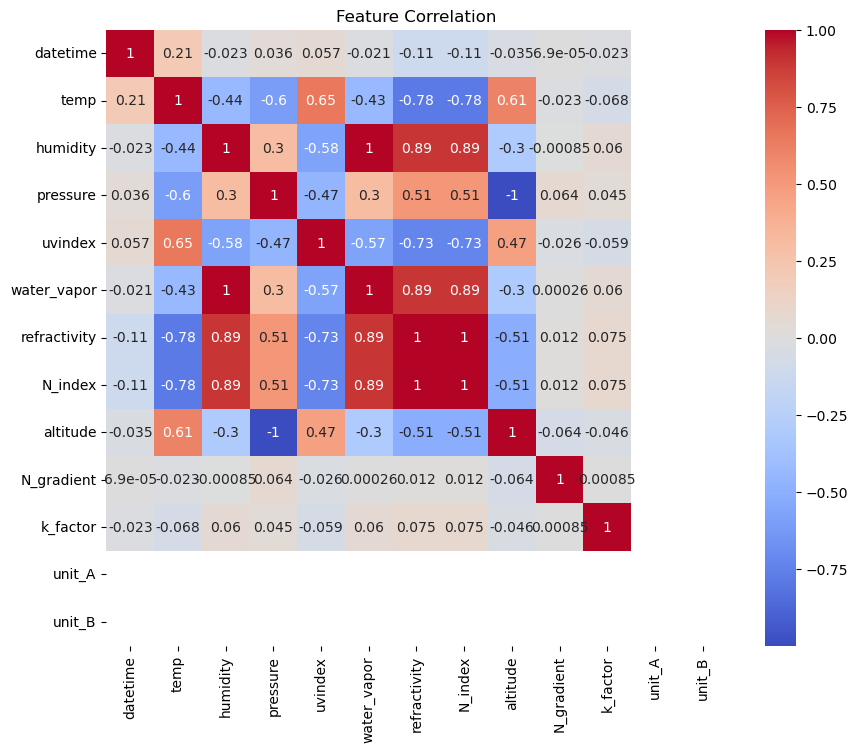

In [47]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

 ## Data Analysis

In [50]:
df

,datetime,temp,humidity,pressure,uvindex,water_vapor,refractivity,N_index,altitude,N_gradient,k_factor,unit_A,unit_B
1,2022-09-02,23.7,0.0889,1014.9,5,137.620549,94775.086907,1.094775,-14.14,346.775462,-1.425787e-07,77.6,4810
2,2022-09-03,24.3,0.0881,1014.8,6,136.431611,89480.779198,1.089481,-13.31,-6378.683988,7.751252e-09,77.6,4810
3,2022-09-04,24.6,0.0853,1015.1,8,132.348343,84833.099450,1.084833,-15.90,1794.470945,-2.755285e-08,77.6,4810
4,2022-09-05,25.5,0.0844,1015.5,8,131.071694,78327.977759,1.078328,-19.40,1858.606197,-2.660208e-08,77.6,4810
5,2022-09-06,24.6,0.0873,1014.1,8,135.161849,86565.284301,1.086565,-7.31,681.332220,-7.256782e-08,77.6,4810
...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,2025-05-01,26.3,0.0872,1010.7,6,134.562148,75595.782316,1.075596,22.09,-476.459071,1.037713e-07,77.6,4810
974,2025-05-02,26.0,0.0855,1012.1,7,132.251318,76043.803003,1.076044,9.94,-36.874131,1.340851e-06,77.6,4810
975,2025-05-03,26.3,0.0824,1012.4,7,127.722755,71910.063271,1.071910,7.36,1602.224702,-3.085884e-08,77.6,4810
976,2025-05-04,26.8,0.0822,1012.0,9,127.377151,69125.810515,1.069126,10.84,-800.072631,6.179787e-08,77.6,4810


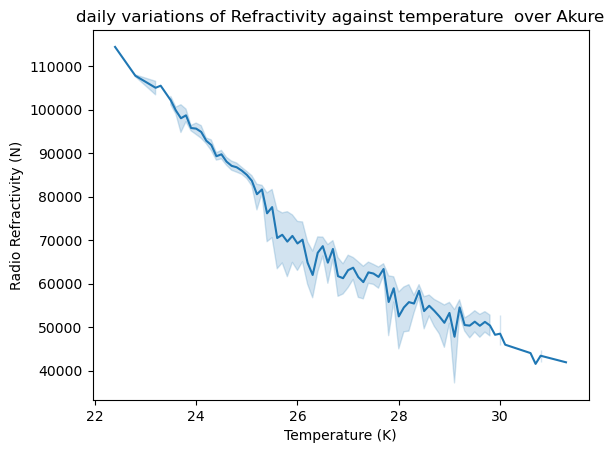

In [52]:
sns.lineplot(x=df["temp"], y=df["refractivity"])
plt.xlabel("Temperature (K)")
plt.ylabel("Radio Refractivity (N)")
plt.title("daily variations of Refractivity against temperature  over Akure")
plt.show()


In [53]:
# The lower the temperature, the higher the refractivity and the higher the  temperature, the lower the refractivit.
#Lower Temperature to Higher Refractivity may cause EM waves bend more toward Earth. also a Potential for super-refraction or ducting
#in combination with steep gradients which May increase signal reach, but can also lead to fading if unstable.

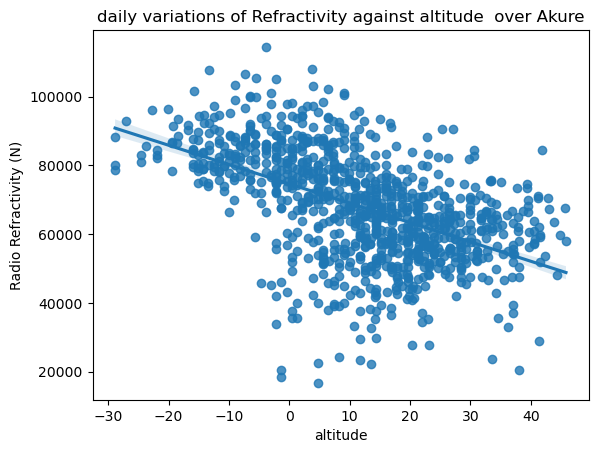

In [54]:
sns.regplot(x=df["altitude"], y=df["refractivity"])
plt.xlabel("altitude")
plt.ylabel("Radio Refractivity (N)")
plt.title("daily variations of Refractivity against altitude  over Akure")
plt.show()


In [55]:

# shows the variation of Radio refractivity (N) with altitude.  This plot shows that the higher the altitude the lower the refractivity
# and the faster wireless communication may be transmitted from place to place within the study area. Hence, all networks that rely on radio frequency
# will travel faster.

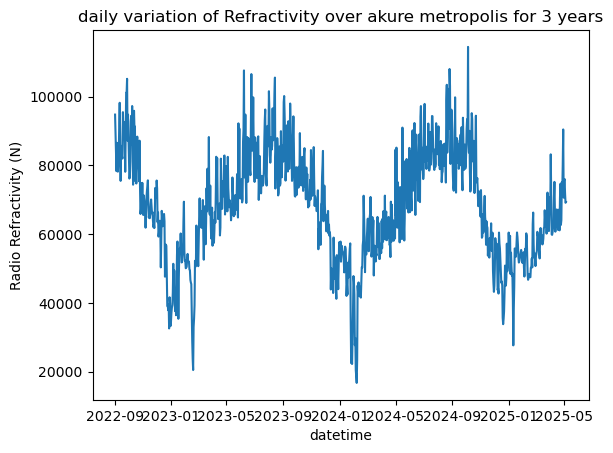

In [56]:
sns.lineplot(x=df["datetime"], y=df["refractivity"])
plt.xlabel("datetime")
plt.ylabel("Radio Refractivity (N)")
plt.title("daily variation of Refractivity over akure metropolis for 3 years")
plt.show()

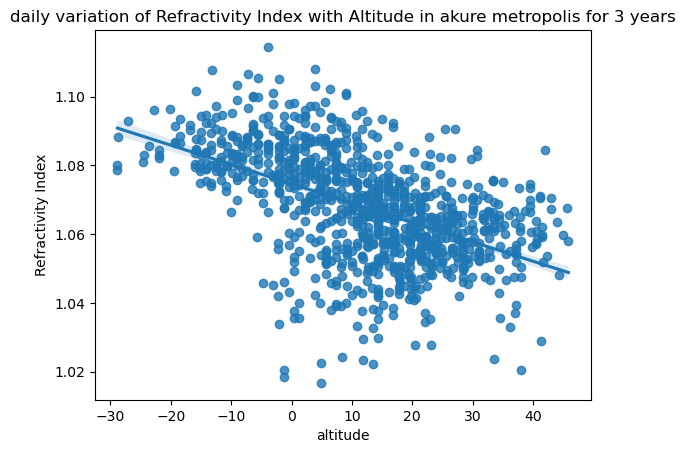

In [59]:
sns.regplot(x=df["altitude"], y=df["N_index"])
plt.xlabel("altitude")
plt.ylabel("Refractivity Index")
plt.title("daily variation of Refractivity Index with Altitude in akure metropolis for 3 years")
plt.show()

In [64]:
#this plot shows that the higher the altitude the lower the refractive index (n) and when (n) is very small electromagnetic waves travel faster.

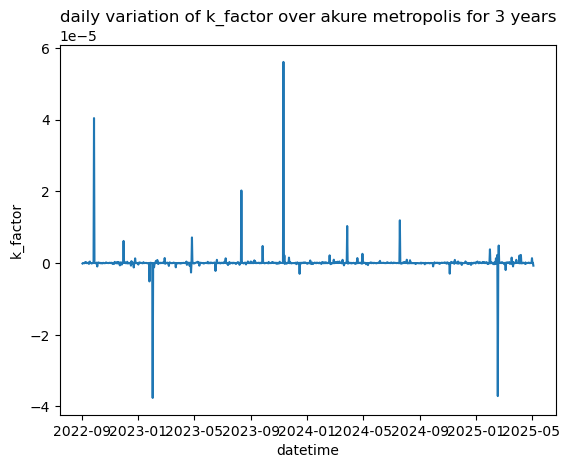

In [66]:
sns.lineplot(x=df["datetime"], y=df["k_factor"])
plt.xlabel("datetime")
plt.ylabel("k_factor")
plt.title("daily variation of k_factor over akure metropolis for 3 years")
plt.show()

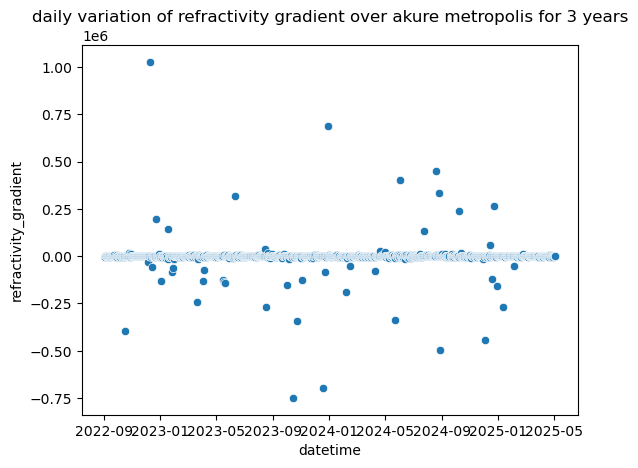

In [68]:
sns.scatterplot(x=df["datetime"], y=df["N_gradient"])
plt.xlabel("datetime")
plt.ylabel("refractivity_gradient")
plt.title("daily variation of refractivity gradient over akure metropolis for 3 years")
plt.show()

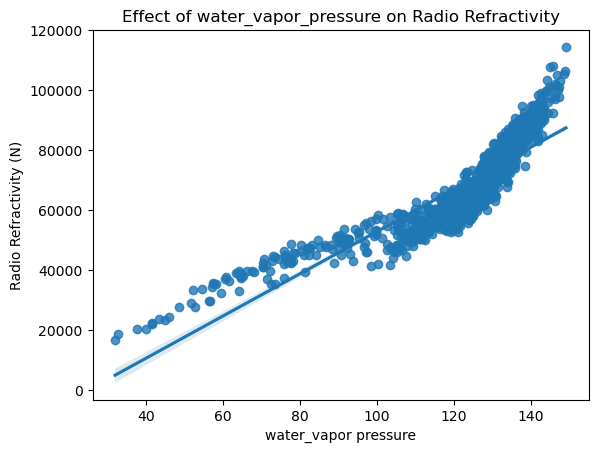

In [70]:
sns.regplot(x=df["water_vapor"], y=df["refractivity"])
plt.xlabel("water_vapor pressure")
plt.ylabel("Radio Refractivity (N)")
plt.title("Effect of water_vapor_pressure on Radio Refractivity")
plt.show()

In [ ]:
# The higher the water vapour, the higher the refractivity

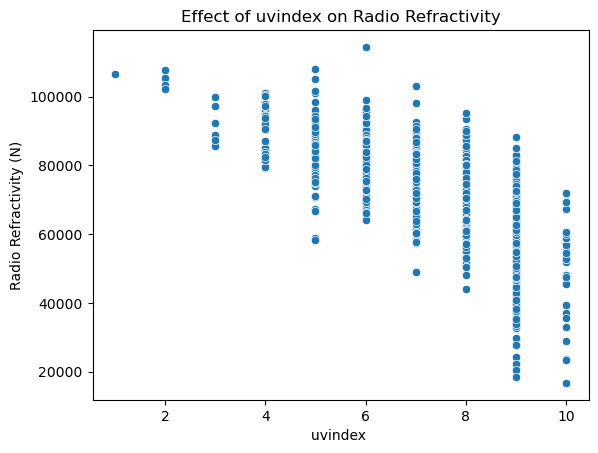

In [72]:
sns.scatterplot(x=df["uvindex"], y=df["refractivity"])
plt.xlabel("uvindex ")
plt.ylabel("Radio Refractivity (N)")
plt.title("Effect of uvindex on Radio Refractivity")
plt.show()

# MODEL

In [78]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso  # Regression ML Algorithm
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor


In [82]:
# Dependent and Independent Features
X_features = df[["water_vapor","temp","pressure","unit_A", "unit_B" ]]  # Predictor
y_feature = df["refractivity"]  # Target

In [132]:
# DecisionTree model dont need feature scalling

In [86]:
# Train Test Split
#X_train, X_test, y_train, y_test = train_test_split(X_features_scaled, y_feature, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_feature, test_size=0.2, random_state=42)

In [88]:
X_train.shape

(781, 5)

In [90]:
y_train.shape

(781,)

In [92]:
X_test.shape

(196, 5)

In [94]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [120]:
# Build Model with DecisionTree Regressor

regressor_model = DecisionTreeRegressor(max_depth=4, random_state=42)
regressor_model.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=4, random_state=42)

In [122]:
y_pred = regressor_model .predict(X_test)

In [124]:
# Check for model Accuracy
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error

print("R2 Score", r2_score(y_test, y_pred))

R2 Score 0.9621682943697502


In [126]:
#decission tree dont need feature scalling

In [128]:
# make a prediction
value = np.array([137.620549,23.7,1014.9,77.6,4810]).reshape(1,-1)


In [130]:
 regressor_model .predict(value)

C:\Users\BRING JOY\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([93638.52933302])